In [1]:
pip install qiskit-aer

In [39]:
#para instalar o qiskit-aer lembrar de fazer o pip install qiskit-aer
#depois ir no kernell e clicar em restart kernel and clear outputs

1)Utilize o IBM Qiskit para simular um experimento de teletransporte quântico.Faça isso usando o comando if_test. Descreva o processo e discuta os resultados.

In [33]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit import ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

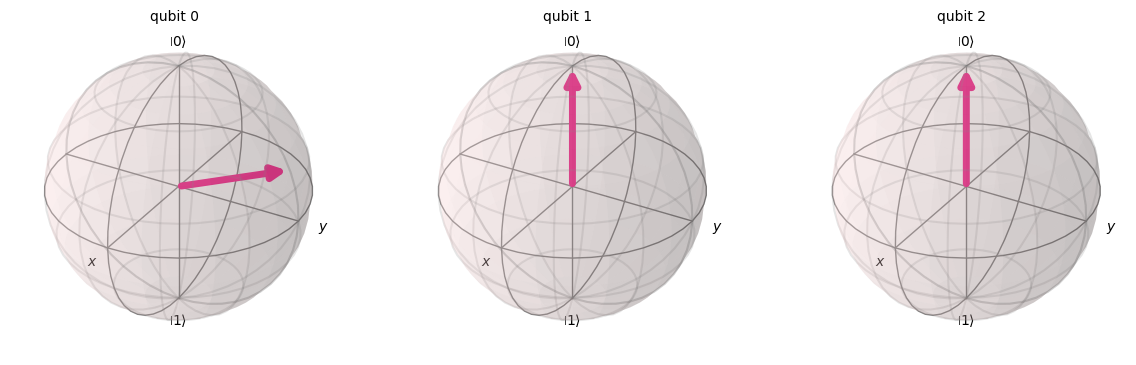

In [34]:
#aqui zera o circuito
qrA = QuantumRegister(2, 'alice')
qrB = QuantumRegister(1, 'bob')
crz, crx = ClassicalRegister(1), ClassicalRegister(1)
circuit = QuantumCircuit(qrA, qrB, crz, crx)

circuit.initialize([np.sqrt(0.7), 1j*np.sqrt(0.3)],0)

plot_bloch_multivector(circuit)

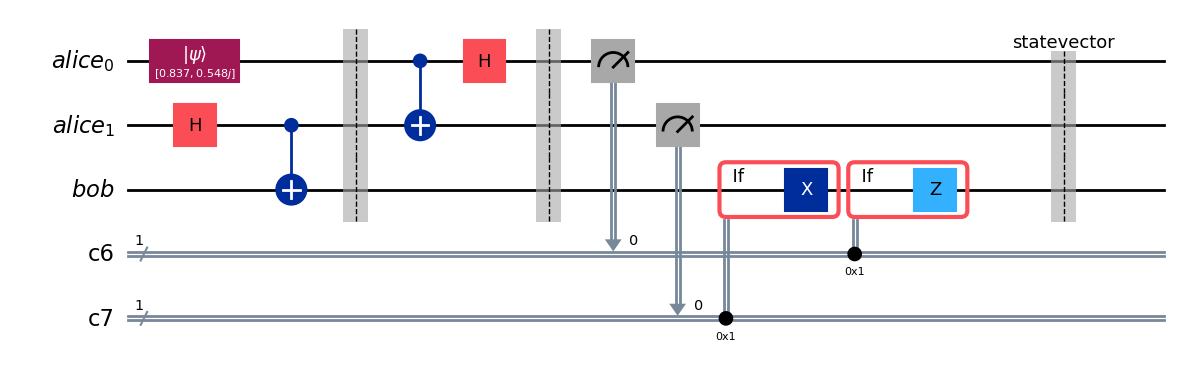

In [36]:
#Preparação do par emaranhado (Bell State) entre qubits 1 e 2
circuit.h(qrA[1])       # Aplicamos a porta de Hadamard no qubit 1 de Alice
circuit.cx(qrA[1], qrB[0])   # Aplicamos a porta CNOT com qubit 1 de Alice como controle e qubit 2 (Bob) como alvo
circuit.barrier()  # Adicionamos uma barreira para indicar a separação das etapas do circuito

# Emaranhamento do qubit de Alice (qubit 0) com o Bell State
circuit.cx(qrA[0], qrA[1])   # Aplicamos uma porta CNOT com qubit 0 de Alice como controle e qubit 1 de Alice como alvo
circuit.h(qrA[0])       # Aplicamos a porta de Hadamard no qubit 0 de Alice
circuit.barrier()  # Adicionamos outra barreira

# Medições de Bell nos qubits de Alice
circuit.measure(qrA[0], crz[0])  # Medimos o qubit 0 de Alice e armazenamos o resultado no bit clássico crz
circuit.measure(qrA[1], crx[0])  # Medimos o qubit 1 de Alice e armazenamos o resultado no bit clássico crx

# Aplicando correções baseadas nos resultados das medições
with circuit.if_test((crx, 1)):
    circuit.x(qrB[0])  # Se o valor de crx for 1, aplicamos uma porta X no qubit 2 (Bob)

with circuit.if_test((crz, 1)):
    circuit.z(qrB[0])  # Se o valor de crz for 1, aplicamos uma porta Z no qubit 2 (Bob)

# Salvando o estado do vetor
circuit.save_statevector()

# Desenhando o circuito
circuit.draw("mpl")

In [37]:
# Discussão dos resultados
# =========================
# Este código implementa o protocolo de teletransporte quântico.
# - Qubit 0 (Alice): O qubit que contém o estado quântico a ser teletransportado.
# - Qubit 1 (Bell State): Parte do par emaranhado de Bell State.
# - Qubit 2 (Bob): O qubit para onde o estado quântico de Alice será teletransportado.

# Passo a passo:
# 1. Preparamos um par emaranhado (Bell State) entre os qubits 1 e 2.
# 2. Emaranhamos o qubit de Alice (qubit 0) com o Bell State.
# 3. Realizamos medições de Bell nos qubits de Alice (qubits 0 e 1).
# 4. Dependendo dos resultados das medições (crx e crz), aplicamos as correções de porta X e Z no qubit de Bob (qubit 2).

# Resultado esperado:
# O estado quântico originalmente no qubit 0 será transferido para o qubit 2, independentemente da distância entre eles,
# sem a necessidade de enviar o estado quântico diretamente.

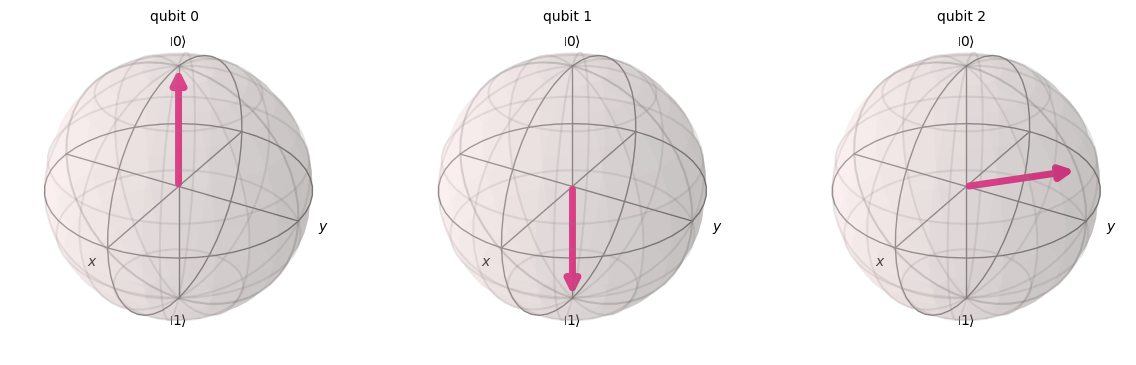

In [38]:
simulador_aer = AerSimulator()
qc_t = transpile(circuit, backend=simulador_aer)

#executando e obtendo o resultado
resultado = simulador_aer.run(qc_t).result()

psi = resultado.get_statevector()

plot_bloch_multivector(psi)